In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('mnist.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
# x_train[0]

In [3]:
# y_train

In [4]:
# y_test

In [5]:
# len(x_train)

In [6]:
# x_train.shape

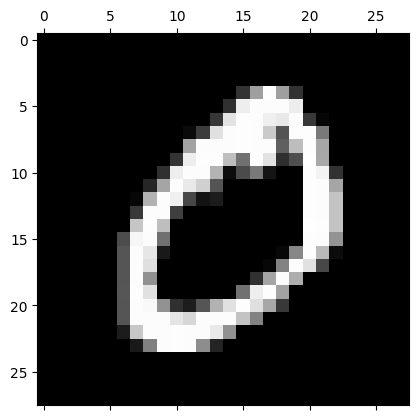

In [7]:
plt.matshow(x_train[1], cmap="gray")

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
# x_train[0]

In [10]:

# model = keras.Sequential([ # The model starts with a Flatten layer to prepare the input.
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7501 - loss: 0.9947 - val_accuracy: 0.9037 - val_loss: 0.3538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9029 - loss: 0.3479 - val_accuracy: 0.9159 - val_loss: 0.2967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9165 - loss: 0.2936 - val_accuracy: 0.9272 - val_loss: 0.2592
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9248 - loss: 0.2662 - val_accuracy: 0.9337 - val_loss: 0.2358
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9347 - loss: 0.2342 - val_accuracy: 0.9389 - val_loss: 0.2181
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9372 - loss: 0.2213 - val_accuracy: 0.9428 - val_loss: 0.2047
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9433 - loss: 0.2035 - val_accuracy: 0.9465 - val_loss: 0.1901
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.9475 - l

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9461 - loss: 0.1855
Loss=0.161
Accuracy=0.954


In [15]:
import random

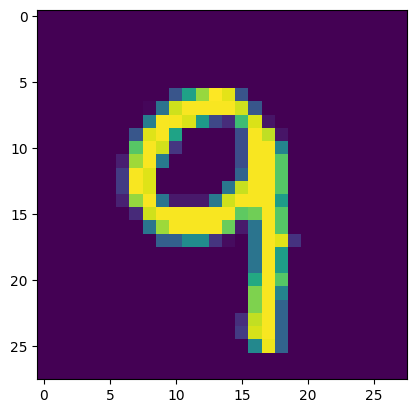

In [16]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
import numpy as np
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
Handwritten number in the image is= 9


In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Training Accuracy

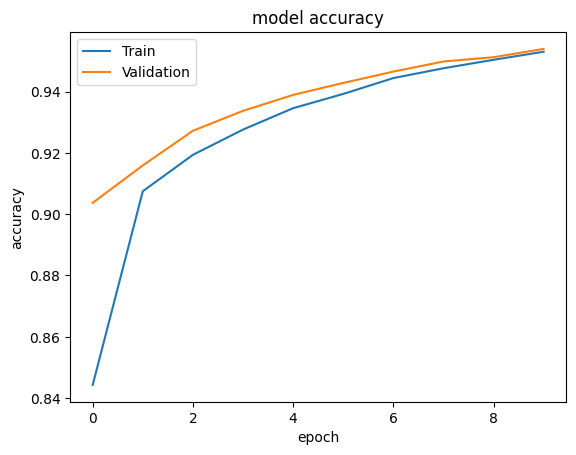

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

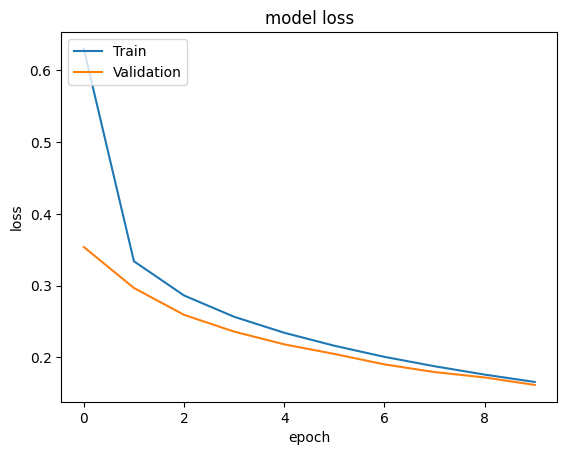

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
# help(plt)